# SAE S2.02 : 
# Exploration algorithmique d’un problème

BRAHMI Moundir - Partie 5  - 23%
DELIN Maxime  - Partie 4  - 23%
GIRODENGO Camille  - Partie 1, 2, Algorithme PageRank itératif  - 31%
ROUBAUD Axel  - Partie 3  -  23%


In [1]:
import networkx as nx
from numpy import *
import matplotlib.pyplot as plt
import random as rd

## Partie 1 : PageRank - version itérative, premier exemple

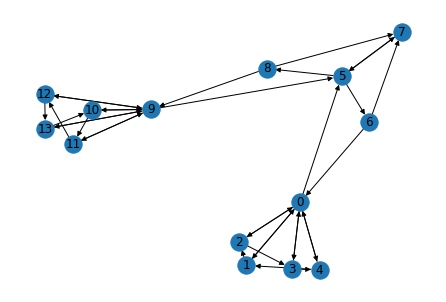

In [2]:
A = array([[0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0,0,0,0,0,0,1,1,1,0,0,0,0,0],
[1,0,0,0,0,0,0,1,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,1,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1],
[0,0,0,0,0,0,0,0,0,1,1,0,0,0]])

G1 = nx.DiGraph(A)
pos = nx.circular_layout(G1)
nx.draw(G1,with_labels=True)
plt.show()

### Question 1

Voici l'algorithme de la puissance itérée :

In [3]:
def norme(X):
    norm = 0
    for i in range(len(X)):
        norm = norm + X[i]**2
    return sqrt(norm)

def puissance_iteree(e, M):
    Xbis = []
    for i in range(len(M)):
        Xbis.append(rd.randint(0, 100))
    Xbis = array(Xbis)
    while (True):
        prevXbis = Xbis
        Xbis = (M.dot(Xbis)) / norme(M.dot(Xbis))
        if (norme(Xbis - prevXbis) < e):
            break
    return norme(M.dot(Xbis)), Xbis

Et voici l'algorithme de transformation en matrice PageRank :

In [4]:
def nombreLinks(M, j):
    count = 0
    for i in range(len(M)):
        count = count + M[i][j]
    return count;

def pageRankMatrice(M):
    Q = M
    N = len(Q)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                Q[i][j] = Q[i][j] / nombreLinks(M, j)
            else:
                Q[i][j] = 0
    return Q

L'algorithme de la puissance itérée permet de calculer la valeur propre la plus grande et le vecteur propre associé d'une matrice "M".  
Ce vecteur propre "v" a la particularité d'être solution de l'équation :  
    v = M v  
  
Or en regardant le principe de l'algorithme de PageRank et son explication en notations matricielles, on remarque que le principe est le même :  
Le vecteur r des scores est solution de l'équation r = Q r  où Q est la matrice d'adjacence des scores.  

### Question 2

In [5]:
# Application de l'algo transition 1 PageRank
A2 = pageRankMatrice(A)
#print("Matrice PageRank obtenue :")
#print(A2)
print()
print("Valeur propre trouvée :")
print(puissance_iteree(10**-5, A2)[0])
print()
print("Vecteur de scores trouvé :")
print(puissance_iteree(10**-5, A2)[1])


Valeur propre trouvée :
1.2775160126453826

Vecteur de scores trouvé :
[0.14980256 0.05770013 0.06562388 0.07224721 0.07308271 0.17112434
 0.07522253 0.05740833 0.12425245 0.63075587 0.2972985  0.34443722
 0.38484683 0.39077212]


Vérification du vecteur des scores :

In [6]:
l,r = puissance_iteree(10**-5, A2)

print("Norme de r : ")
print(norme(r))
print("Valeur de r :")
print(r)
print()
print("Norme de Ar :")
print(l)
print("Valeur de Ar :")
print(A2.dot(r))
print()
print("Vérifications")
print("Norme de Ar - r :")
print(norme(A2.dot(r) - r))
print("Valeur de Ar - r :")
print(A2.dot(r) - r)

Norme de r : 
1.0
Valeur de r :
[0.14980517 0.05770132 0.06562521 0.07224867 0.07308417 0.17112549
 0.07522371 0.05740873 0.12425254 0.63075537 0.29729802 0.34443669
 0.38484626 0.39077156]

Norme de Ar :
1.2775161941473177
Valeur de Ar :
[0.19137152 0.07371118 0.08383368 0.09229492 0.09336227 0.21861249
 0.09609632 0.0733395  0.15873441 0.80580155 0.37980431 0.44002487
 0.49164886 0.49921851]

Vérifications
Norme de Ar - r :
0.27751619433679536
Valeur de Ar - r :
[0.04156635 0.01600986 0.01820846 0.02004625 0.0202781  0.047487
 0.02087261 0.01593076 0.03448187 0.17504618 0.08250629 0.09558818
 0.1068026  0.10844695]


En tentant de faire la vérification numérique avec linalg.solve(A, r), la fonction renvoie une erreur LinAlgError de type Singular matrix.  
  
Nous avons donc réalisé la vérification manuellement en faisant la soustraction entre Ar et r et en vérifiant la valeur de la norme de r.  
De ce que l'on peut observer, la norme de r se rapproche effectivement de 1 et la différence entre Ar et r est proche de 0, avec une marge de 0.1 en moyenne.  
Ce n'est effectivement pas le plus préci des résultats mais cela reste un résultat correct.  


## Partie 2 : PageRank - version itérative, deuxième example

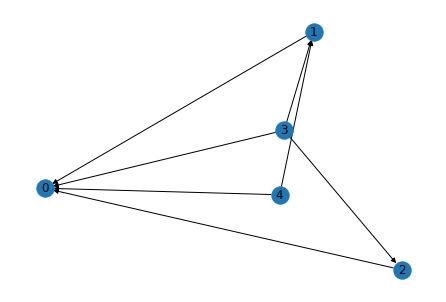

In [7]:
B = array([[0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,0.0],
[1.0,1.0,1.0,0.0,0.0],
[1.0,1.0,0.0,0.0,0.0]])

G2 = nx.DiGraph(B)
pos = nx.circular_layout(G2)
nx.draw(G2,with_labels=True)
plt.show()

### Question 1

In [8]:
# Application de l'algo transition 1 PageRank
B2 = pageRankMatrice(B)

print(B2)

print("Resultat des scores : ")
print(puissance_iteree(10**-5, B2)[1])

[[0.         0.         0.         0.         0.        ]
 [0.25       0.         0.         0.         0.        ]
 [0.30769231 0.         0.         0.         0.        ]
 [0.39097744 0.5        1.         0.         0.        ]
 [0.51317059 0.66666667 0.         0.         0.        ]]
Resultat des scores : 


/tmp/ipykernel_7417/421269999.py:14: RuntimeWarning: invalid value encountered in true_divide
  Xbis = (M.dot(Xbis)) / norme(M.dot(Xbis))


KeyboardInterrupt: 

En appliquant l'algorithme de la partie 1, on se retrouve avec une erreur. Il est donc probable que la matrice PageRank transition B2 ne puisse par être traitée par un algorithme de puissance itérée car les vecteurs de score formés ont des normes nulles.  
  
On va définir un algorithme qui renvoie une matrice de transition secondaire pour palier à ce problème :  

In [9]:
def transitionMatrice(M, a):
    P = M
    N = len(P)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                P[i][j] = a*M[i][j] + ((1 - a)/N)
            else:
                P[i][j] = 1/N
    return P


### Question 2

In [10]:
B3 = transitionMatrice(B2, 0.85)

print("Matrice de transition pour B :")
print(B3)
print()

l,r = puissance_iteree(10**-5, B3)

print("Norme de r : ")
print(norme(r))
print("Valeur de r :")
print(r)
print()

print("Norme de B3 r :")
print(l)
print("Valeur de B3 r :")
print(B3.dot(r))
print()

print("Vérifications")
print("Norme de B3 r - r :")
print(norme(B3.dot(r) - r))
print("Valeur de B3 r - r :")
print(B3.dot(r) - r)

Matrice de transition pour B :
[[0.03       0.03       0.03       0.2        0.2       ]
 [0.2425     0.03       0.03       0.03       0.03      ]
 [0.29153846 0.03       0.03       0.03       0.03      ]
 [0.36233083 0.455      0.88       0.03       0.03      ]
 [0.466195   0.59666667 0.03       0.03       0.03      ]]

Norme de r : 
1.0
Valeur de r :
[0.38842851 0.20942279 0.2371524  0.70019792 0.50867181]

Norme de B3 r :
0.6869285937532533
Valeur de B3 r :
[0.26682406 0.14385726 0.1629052  0.48098719 0.34941969]

Vérifications
Norme de B3 r - r :
0.31307140626940927
Valeur de B3 r - r :
[-0.12160446 -0.06556553 -0.0742472  -0.21921072 -0.15925211]


Grâce à cet algorithme de transition, il est désormais possible de calculer les scores PageRank de matrices auquelles l'algorithme de puissance itérée ne peux normalement pas s'appliquer.  
De plus, on remarque que le calcul des scores est beaucoup plus précis car le vecteur différence entre B3 et r a maintenant une marge d'environ 0.05 en moyenne. Une nette amélioration par rapport aux résultats de la partie 1.  
  
Voici donc le nouvel algorithme "iterativePageRank" :  


In [11]:
def iterativePageRank(M, e, a):
    M2 = pageRankMatrice(M)
    M2 = transitionMatrice(M2, a)
    return puissance_iteree(e, M2)

## Partie 3 : PageRank - version itéerative, analyse

### Question 1

In [12]:
A2 = pageRankMatrice(A)
#print(A2)
#print()

A3 = transitionMatrice(A2, 0.85)
print()
l, r = puissance_iteree (10**-5, A3)
print("Valeur des scores de A3 : ", l,r)
print()
print("Valeur de la différence A3*r - r : ", A3.dot(r) - r)
print()
print()

A4 = transitionMatrice(A2, 0.5)
l, r = puissance_iteree (10**-5, A4)
print("Valeur des scores de A4 : ", l,r)
print()
print("Valeur de la différence A4*r - r : ", A4.dot(r) - r)
print()
print()


Valeur des scores de A3 :  1.0580307724797084 [0.32083474 0.14554203 0.160179   0.1734674  0.17638826 0.30125725
 0.16590944 0.11762002 0.13672773 0.54950141 0.24037622 0.27783411
 0.31289525 0.32153219]

Valeur de la différence A3*r - r :  [0.01861484 0.00844439 0.00929358 0.01006455 0.01023404 0.01748046
 0.00962629 0.00682496 0.00793438 0.03189019 0.01395061 0.01612455
 0.01815935 0.01866056]


Valeur des scores de A4 :  1.026500684308717 [0.3471649  0.22217612 0.22870603 0.2366087  0.24172309 0.34705253
 0.22930722 0.19564724 0.20661555 0.39487314 0.2339404  0.24493243
 0.2586992  0.26800925]

Valeur de la différence A4*r - r :  [0.00920099 0.00588802 0.00606127 0.00627064 0.00640618 0.00919734
 0.00607705 0.00518521 0.00547534 0.01046394 0.00619904 0.00649033
 0.00685505 0.00710172]




Analyser l’influence du critere d’arrêt dans l’algorithme de la puissance itérée la valeur comparer a la partie 1 ne sera pas la meme est sera plus précise.  
 Donc l'influence du critére est tres influent.

### Question 2

On choisit de créer dans le graphique de la partie 1 un hub et une autorité suplémentaire.  
On déclare la page 5 comme étant un hub et ajoutons les liens sortants nécessaires à l'attribution de ce statut.  
On déclare la page 8 comme étant une autorité et ajoutons les liens entrants nécessaire à l'attribution de ce statut. 

In [13]:
A1 = array([[0.0,1.0,1,1,1,1,0,0,0,0,0,0,0,0],#1
           [1,0,1,0,0,0,0,0,0,0,0,0,0,0],#2
           [1,0,0,1,0,0,0,0,0,0,0,0,0,0],#3
           [1,0,0,0,1,0,0,1,0,0,0,0,0,0],#4
           [1,1,0,1,1,0,1,0,1,1,1,0,0,0],#5 HUB
           [0,0,0,0,0,0,1,1,1,0,0,0,0,0],#6
           [1,0,0,0,0,0,0,1,0,0,0,0,0,0],#7
           [0,0,0,0,0,1,0,0,0,0,0,0,0,0],#8 AUTORITE
           [0,0,0,0,0,0,0,1,0,1,0,0,0,0],#9
           [0,0,0,0,0,1,0,0,0,0,1,1,1,1],#10
           [0,0,0,0,0,0,0,1,0,1,0,1,0,0],#11
           [0,0,0,0,0,0,0,0,0,1,0,0,1,0],#12
           [0,0,0,0,0,0,0,0,0,1,0,0,0,1],#13 
           [0,0,0,0,0,0,0,0,0,1,1,0,0,0]])#14

In [14]:
A2 = pageRankMatrice(A1)
#print(A2)
#print()

A3 = transitionMatrice(A2, 0.85)
print()
l, r = puissance_iteree (10**-5, A3)
print("Valeur des scores de A3 : ", l,r)
print()
print("Valeur de la différence A3*r - r : ", A3.dot(r) - r)
print()
print()


Valeur des scores de A3 :  1.2897078428978266 [0.38126589 0.15046538 0.17079721 0.30377665 0.69776633 0.13750453
 0.15735445 0.06400527 0.07546346 0.27311468 0.15044368 0.14534549
 0.15938829 0.16264227]

Valeur de la différence A3*r - r :  [0.11045798 0.04359205 0.04948238 0.08800803 0.20215058 0.03983621
 0.04558779 0.01854281 0.02186148 0.07911842 0.04358195 0.04210462
 0.04617268 0.04711547]




Pour certains score leurs valeur on diminué comparé a d autre qui on augmenté mais l'on peut voir que se qui on etait change sur la matrice dont 8 qui a eu son autorité augmenté sont score a dmininué.

Alors que le score de 5 qui est lu devenue un HUB lui a augmenté conciderablement donc les valeur on bien change compare a la matrice d'avant accause de l'autorité et du hub qui a etait mis.

### Question 3

Pour augmenter le score de certaine pages il faudrait que on augmente le HUB et qu'il y est moin d'autorité car avec sa le score augmentera exemple si j'ajoute plus de lien sortant au 5 sont score augmentera.

On pourra le voir dessous ou avec la matrice A8 j'ai ajouté plein de lien sortant dans des ligne et les scores sont bien remonté comparé a la question 2 

In [15]:
A8 = array([[0.0,1.0,1,1,1,1,0,0,0,0,0,0,0,0],#1
           [1,0,1,1,1,0,0,1,0,0,1,0,1,0],#2 HUB
           [1,1,0,1,0,1,0,1,0,0,1,0,1,1],#3 HUB 
           [1,0,0,0,1,0,0,1,0,0,0,0,0,0],#4
           [1,1,0,1,1,0,1,0,1,1,1,0,0,0],#5 HUB
           [0,0,0,0,0,0,1,1,1,0,0,0,0,0],#6
           [1,0,0,0,0,0,0,1,0,0,0,0,0,0],#7
           [0,0,0,0,0,1,0,0,0,0,0,0,0,0],#8 AUTORITE
           [0,0,0,0,0,0,0,1,0,1,0,0,0,0],#9
           [0,0,0,0,0,1,0,0,0,0,1,1,1,1],#10
           [0,0,0,0,0,0,0,1,0,1,0,1,0,0],#11
           [0,0,0,0,0,0,0,0,0,1,0,0,1,0],#12
           [0,1,0,1,0,1,0,1,0,1,0,1,0,1],#13 HUB
           [1,1,0,1,0,0,0,0,1,1,1,0,1,0]])#14 HUB

In [16]:
A2 = pageRankMatrice(A8)
#print(A2)
#print()

A3 = transitionMatrice(A2, 0.03)
print()
l, r = puissance_iteree (10**-5, A3)
print("Valeur des scores de A3 : ", l,r)
print()
print("Valeur de la différence A3*r - r : ", A3.dot(r) - r)
print()
print()


Valeur des scores de A3 :  1.0147782961388145 [0.26585502 0.27017053 0.27009634 0.26157788 0.27620499 0.26517093
 0.25975988 0.25764722 0.2589006  0.26963285 0.2629642  0.26061854
 0.27977051 0.28180977]

Valeur de la différence A3*r - r :  [0.00392889 0.00399267 0.00399156 0.00386568 0.00408184 0.00391877
 0.0038388  0.00380759 0.00382611 0.00398471 0.00388616 0.0038515
 0.00413452 0.00416467]




### Question 4

In [17]:
A2 = pageRankMatrice(A1)
#print(A2)
#print()

A3 = transitionMatrice(A2, 0.03)
print()
l, r = puissance_iteree (10**-5, A3)
print("Valeur des scores de A3 : ", l,r)
print()
print("Valeur de la différence A3*r - r : ", A3.dot(r) - r)
print()
print()


Valeur des scores de A3 :  1.0021109394456913 [0.27089391 0.26466681 0.26316873 0.26455366 0.28105444 0.2690472
 0.2638349  0.26214314 0.26252675 0.27453195 0.26766092 0.26535352
 0.26581205 0.26573799]

Valeur de la différence A3*r - r :  [0.00057185 0.0005587  0.00055554 0.00055847 0.0005933  0.00056794
 0.00055695 0.00055337 0.00055418 0.0005795  0.00056502 0.00056014
 0.0005611  0.00056094]




En changeant le facteur d'amortissement α les score qui on monté et se qui on baissé se restabilise.  
  
La raison : α représente la probabilté qu'un utilisateur clique un lien. Ainsi, au plus le facteur atténuateur se rapproche de 0, au moins il y a de chance qu'un utilisateur clique sur un lien contenu dans une page, au plus les scores s'égalisent puisque la présence de liens sur une page perd en importance.

## Partie 4 : PageRank - version itérative, analyse

### Question 1 :

In [18]:
#I - Allocine (Profondeur : 25) :

Allocine = array([[0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
            [1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
            [1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
            [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0]])


In [19]:
#II - Doc Python (Profondeur : 10) :

DocPython = array([[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
             [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0]])


In [20]:
#III - GitHub (Profondeur : 20) :

Github = array([[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0],
          [1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
          [1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]])


In [21]:
print("Allocine : \n\n",iterativePageRank(Allocine, 10**-5, 0.85)[0],"\n")
print("Vecteur des scores : ")
print(iterativePageRank(Allocine, 10**-5, 0.85)[1])
print()
print()
print()

print("Doc Python : \n\n",iterativePageRank(DocPython, 10**-5, 0.85)[0],"\n")
print("Vecteur des scores : ")
print(iterativePageRank(DocPython, 10**-5, 0.85)[1])
print()
print()
print()

print("GitHub : \n\n",iterativePageRank(Github, 10**-5, 0.85)[0],"\n")
print("Vecteur des scores : ")
print(iterativePageRank(Github, 10**-5, 0.85)[1])
print()
print()
print()


Allocine : 

 1.4674140774774114 

Vecteur des scores : 
[0.62153556 0.05013679 0.05069953 0.0394436  0.03993652 0.500222
 0.07522682 0.06055088 0.0753007  0.04579303 0.04701828 0.08202013
 0.08323865 0.05216845 0.08052107 0.05209123 0.21217382 0.14989032
 0.16579053 0.06554139 0.148135   0.24979818 0.09875945 0.10346407
 0.3260218 ]



Doc Python : 

 1.194943556440049 

Vecteur des scores : 
[0.39388834 0.12925335 0.18161907 0.19768999 0.21846574 0.24597938
 0.28348736 0.33639486 0.41394157 0.53195055]



GitHub : 

 2.1379403432495634 

Vecteur des scores : 
[0.08780595 0.0324143  0.08669687 0.09069422 0.09519554 0.10029681
 0.10611899 0.11281634 0.12058831 0.12969675 0.14049125 0.15344735
 0.16922586 0.18876712 0.2134457  0.24533262 0.28765505 0.34562864
 0.42799779 0.54985116]





Analyse & Interprétation :


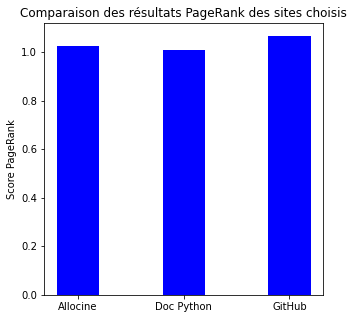



Nous pouvons observer que la différence de score PageRank entre GitHub et les autres sites est importante, cela peut s'expliquer par le fait que le site soit utilisé par des millions d'utilisateurs dans le monde mais également que ce dernier est reconnu par beaucoup, ce qui pousse les administrateurs de sites web réputés d'inclure des liens vers 
GitHub.


In [22]:
print("Analyse & Interprétation :")

#Affichage graphe en barres de Allocine, Doc Python et GitHub


data = {'Allocine':iterativePageRank(Allocine, 10**-5, 0.85)[0], 'Doc Python':iterativePageRank(DocPython, 10**-5, 0.85)[0],
        'GitHub':iterativePageRank(Github, 10**-5, 0.85)[0]}
keys = list(data.keys())
val = list(data.values())

fig = plt.figure(figsize = (5, 5))
 
plt.bar(keys, val, color ='blue',
        width = 0.4)
 
plt.ylabel("Score PageRank")
plt.title("Comparaison des résultats PageRank des sites choisis")
plt.show()


print ("\n\nNous pouvons observer que la différence de score PageRank entre GitHub et les autres sites est importante, cela peut s'expliquer par le fait que le site soit utilisé par des millions d'utilisateurs dans le monde mais également que ce dernier est reconnu par beaucoup, ce qui pousse les administrateurs de sites web réputés d'inclure des liens vers \nGitHub.")

### Question 2

In [23]:
GareDuNord = load("Gare_du_nord_Paris_France_Matrice.npy")
print ("Gare du Nord, Paris\n",GareDuNord,"\n\n\n")

GastonBerger = load("Gaston_Berger.npy")
print ("413 avenue Gaston Berger, Aix en Provence\n",GastonBerger)

Gare du Nord, Paris
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



413 avenue Gaston Berger, Aix en Provence
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
#print("\n\n\n____________________________________________________________\n\nGare du Nord, Paris : \n\n",
#      directPageRank(GareDuNord, 10**-5, 0.85)[0],"\n\n")

#print("413 avenue Gaston Berger, Aix en Provence : \n\n",iterativePageRank(GastonBerger, 10**-5, 0.85),"\n\n")



print("Analyse & Interprétation :")


#Affichage graphe en barres de Gare du Nord et 413 Gaston Berger

#, '413 Avenue Gaston Berger, Aix en Provence':
#iterativePageRank(GastonBerger, 10**-5, 0.85)[0]
data = {'Gare du Nord, Paris':iterativePageRank(GareDuNord, 10**-5, 0.85)[0]}
keys = list(data.keys())
val = list(data.values())

fig = plt.figure(figsize = (5, 5))
 
plt.bar(keys, val, color ='blue',
        width = 0.4)

plt.ylabel("PageRank score")
plt.title("Comparaison des résultats PageRank entre les lieux choisis")
plt.show()



Analyse & Interprétation :


KeyboardInterrupt: 

Nous avons tenté d'exécuter la cellule ci-dessus mais après 30min d'attente le programme python n'ayant pas retourné de résultat, il fut donc impossible pour nous d'analyser quelconque ville.  
Aurions nous eu accès à ces résultats, nous aurions affiché les scores des 10 premieres pages avec score le plus haut de chaque lieu sur un graphique.  
Sur un autre, nous aurions affiché les scores des 10 dernières pages du classement de chaque lieu afin de pouvoir comparer.  

## Partie 5 : PageRank - calcul direct des scores et comparaisons d’algorithmes

### Question 1

Voici le pseudo-code correspondant à l'algorithme de calcul de score PageRank direct :

### Question 2 :

Implémentation de cet algorithme :

In [25]:
def ScoreDirect(P):
    N = len(P)
    r = zeros(N)
    
    colonnes_sum = sum(P, axis=0)
    
    for i in range(N):
        for j in range(N):
            r[i] += P[i][j] / colonnes_sum[j]
    
    return r


In [26]:
print (ScoreDirect(A))

[1.38232294 0.86766321 0.88028154 0.89866954 0.92658524 1.51511108
 0.85677767 0.7032884  0.81352266 1.47991172 0.88028154 0.89866954
 0.92658524 0.97032967]


### Question 3 :

In [27]:
print("Comparaison avec l'ancien algorithme : ")
print(iterativePageRank(A, 0.00001, 0.85)[1])

Comparaison avec l'ancien algorithme : 
[0.33641281 0.22834794 0.23365164 0.24026438 0.24505874 0.3436103
 0.23378957 0.20583575 0.21642128 0.3779446  0.23921918 0.2478937
 0.25917365 0.26774514]


### Question 4 :

Le temps d'éxécution est le même, mais iterativePageRank est un peu plus précis.